In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# create a data generator
datagen = ImageDataGenerator(rescale=1./255)

In [12]:
# load and iterate training dataset
train = datagen.flow_from_directory('mel_spectrograms_manually_labelled/Train', class_mode='binary', color_mode="grayscale", target_size=(9, 128), batch_size=16)

# load and iterate validation dataset
val = datagen.flow_from_directory('mel_spectrograms_manually_labelled/Validation', class_mode='binary', color_mode="grayscale", target_size=(9, 128), batch_size=16)

# load and iterate test dataset
test = datagen.flow_from_directory('mel_spectrograms_manually_labelled/Test', class_mode='binary', color_mode="grayscale", target_size=(9, 128), batch_size=16)

Found 2834 images belonging to 2 classes.
Found 214 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [13]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),
                        strides=1,
                        activation="relu",
                        input_shape=(9, 128, 1)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation="sigmoid"))


model.summary()

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics="accuracy"
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 7, 126, 32)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 126, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28224)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 28225     
Total params: 28,545
Trainable params: 28,545
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(
    train,
    steps_per_epoch=8,
    epochs=10,
    validation_data=val,
    validation_steps=8
)

Epoch 1/10
8/8 [==============================] - 0s 22ms/step - loss: 0.8495 - accuracy: 0.5859 - val_loss: 0.6543 - val_accuracy: 0.6875
Epoch 2/10
8/8 [==============================] - 0s 13ms/step - loss: 0.6169 - accuracy: 0.6875 - val_loss: 0.5834 - val_accuracy: 0.7500
Epoch 3/10
8/8 [==============================] - 0s 15ms/step - loss: 0.5876 - accuracy: 0.6953 - val_loss: 0.5103 - val_accuracy: 0.7578
Epoch 4/10
8/8 [==============================] - 0s 15ms/step - loss: 0.5691 - accuracy: 0.7422 - val_loss: 0.5597 - val_accuracy: 0.7266
Epoch 5/10
8/8 [==============================] - 0s 15ms/step - loss: 0.6341 - accuracy: 0.6719 - val_loss: 0.5521 - val_accuracy: 0.7969
Epoch 6/10
8/8 [==============================] - 0s 14ms/step - loss: 0.5893 - accuracy: 0.7109 - val_loss: 0.5280 - val_accuracy: 0.7500
Epoch 7/10
8/8 [==============================] - 0s 13ms/step - loss: 0.6125 - accuracy: 0.6406 - val_loss: 0.5351 - val_accuracy: 0.7422
Epoch 8/10
8/8 [===========

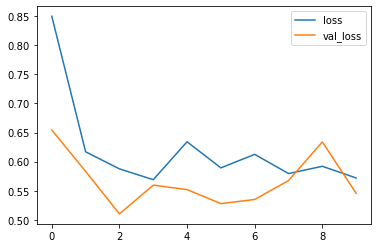

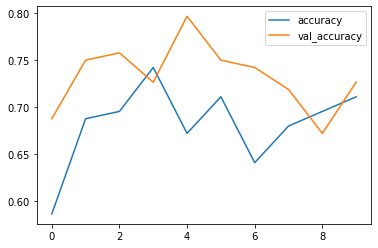

In [15]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()
plt.close()